# Boosting Algerian Agricultural Company Profits

<font color="#fcd695"> The goal from this project is to predict whether investing money in a certain product familly in a certain periode of the year is beneficial for the company or not and to see which products are sold to gather. In other words, we want to dectect how to boost the profit of Algerian Agricultural Company by buying the right products at the right time </strong></font>


## 1 Steps Of The Project:

### 1.1 Understand the Business/Research Context:

<font color="#ffe9c4">Gain a deep understanding of the business or research context. Understand the domain, business goals, and specific challenges.</font>

### 1.2 Data presentation:

<font color="#ffe9c4">
The dataset is csv file that contains a comprehensive dataset capturing various transactions within an agriculture company.The dataset has this features: 


 </font>

 | Column                  | Description                                              |
|-------------------------|----------------------------------------------------------|
| CleEffet                | Identifier for transactions.                             |
| Date                    | Date of the transaction.                                  |
| TypeEffet               | Type of transaction.                                      |
| FamilleArticle          | Family/category of the transaction product.              |
| CodeProduit             | Product code.                                            |
| ReferenceProduit        | Reference code for the product.                           |
| NLot                    | Lot number.                                              |
| Produit_Designation     | Original designation of the product of a transaction detail.|
| DetailEffet_Designation | Designation (sometimes different from Produit_Designation) of a transaction detail.|
| Quantite                | Quantity of the product.                                  |
| PrixAchat               | Purchase price.                                         |
| PrixUnitaireTTC         | Unit price including taxes.                              |
| DetailEffet_Marge       | Margin for the transaction detail.                        |
| Effet_Marge             | Margin for the transaction.                               |
| MontantHT               | Transaction amount excluding taxes.                      |
| Payement                | Payment amount.                                          |



<font color="#ffe9c4">
First in order to work with our dataset we should first import all the libreries that we will need in entry project and then get the dataset in pandas dataframe format 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
data = pd.read_csv("./Project_datamining_final_data_03_12_an1.csv")

<font color="#ffe9c4">
After that we should also know of what type are the attributes of the dataset

In [3]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261001 entries, 0 to 261000
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CleEffet                 261001 non-null  int64  
 1   Date                     261001 non-null  object 
 2   TypeEffet                261001 non-null  object 
 3   FamilleArticle           261001 non-null  object 
 4   Code Produit             160237 non-null  object 
 5   Reference Produit        135717 non-null  object 
 6   NLot                     228637 non-null  object 
 7   Produit_Designation      261001 non-null  object 
 8   DetailEffet_Designation  261001 non-null  object 
 9   Quantite                 261001 non-null  float64
 10  PrixAchat                261001 non-null  object 
 11  PrixUnitaireTTC          261001 non-null  object 
 12  DetailEffet_Marge        261001 non-null  object 
 13  Effet_Marge              261001 non-null  object 
 14  Mont

### 1.4 Exploratory Data Analysis (EDA) (Before Cleaning):

<font color="#ffe9c4">Explore the data to gain insights and an initial understanding of its characteristics. This may involve the use of statistical summaries, visualizations, and other exploratory techniques.</font>

we want to know the differente types of the product familly we have


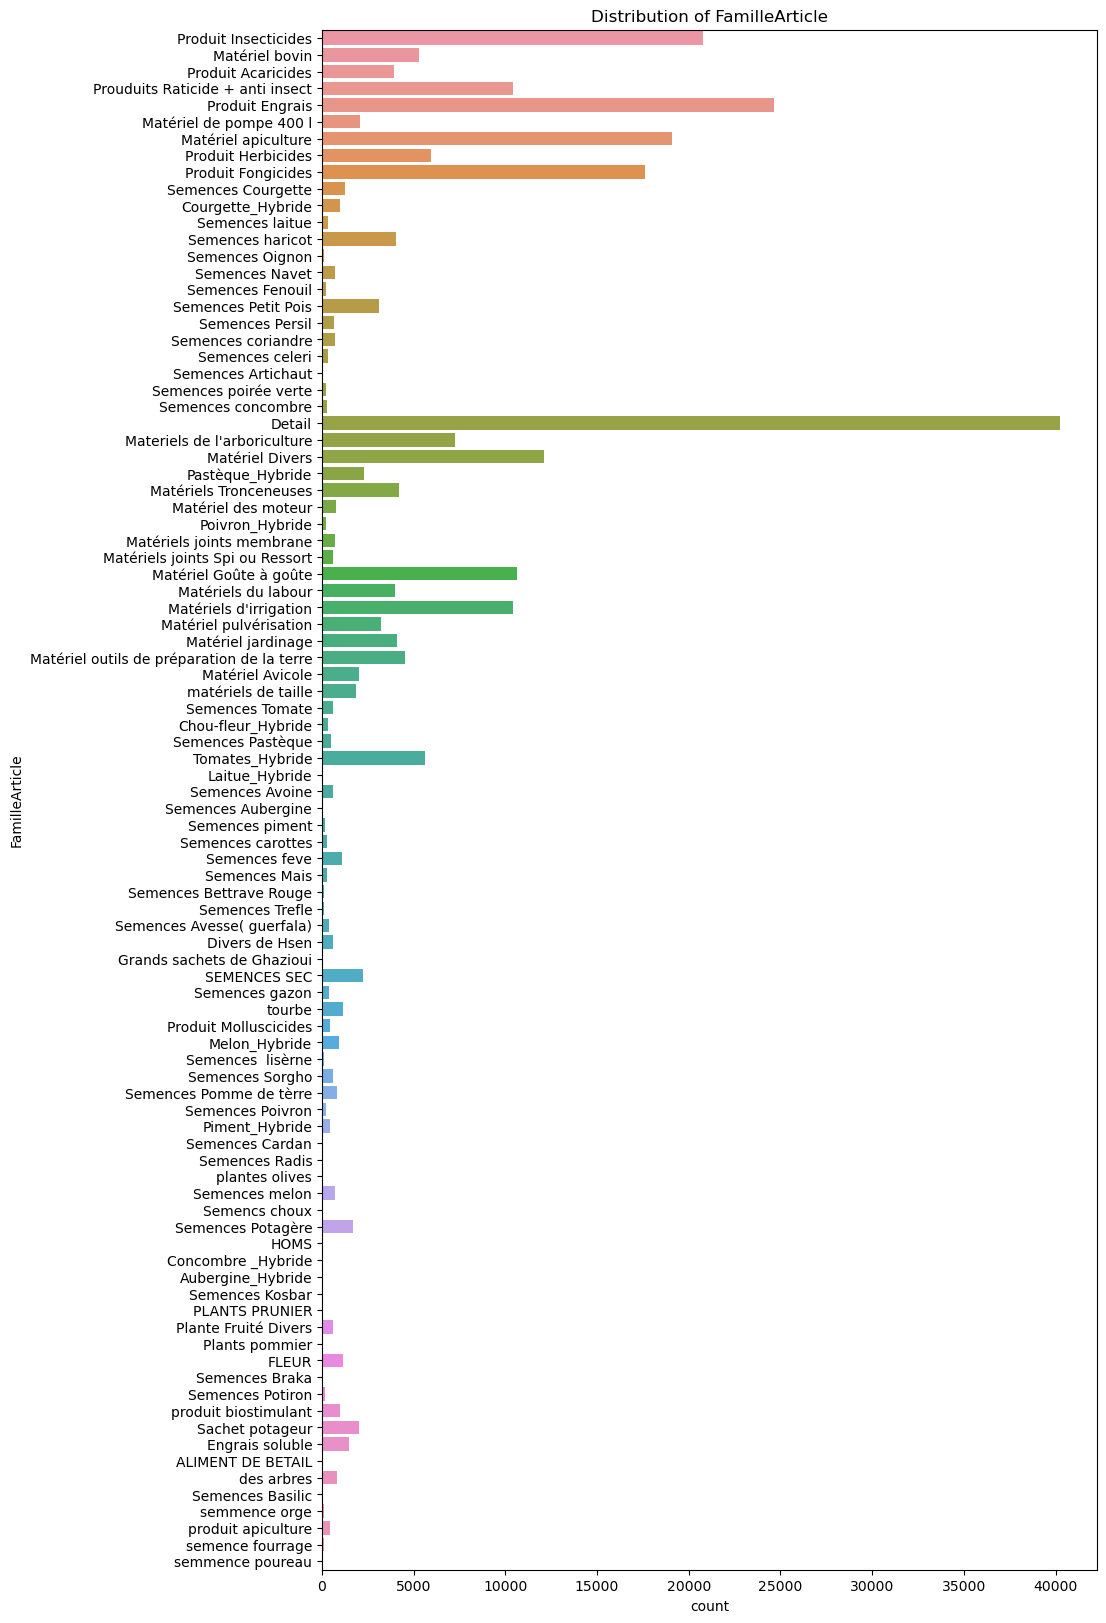

In [4]:
# Count plot for 'FamilleArticle'
plt.figure(figsize=(10, 20))
sns.countplot(y='FamilleArticle', data=data)
plt.title('Distribution of FamilleArticle')
plt.show()

Since the 'PrixAchat' variable is not confidential we want to extract the corrupted data instances. So that we can correct them later   

In [7]:
data.query('(PrixUnitaireTTC - PrixAchat) * Quantite != DetailEffet_Marge and TypeEffet == "Bon de livraison"' )

KeyboardInterrupt: 

In the rest of our work we will be interested only with sellings so we need to know which type of bills we will work with

TypeEffet
Bon de livraison    223143
Bon de réception     18098
Bon de sortie        11451
Bon d'entrée          8309
Name: count, dtype: int64


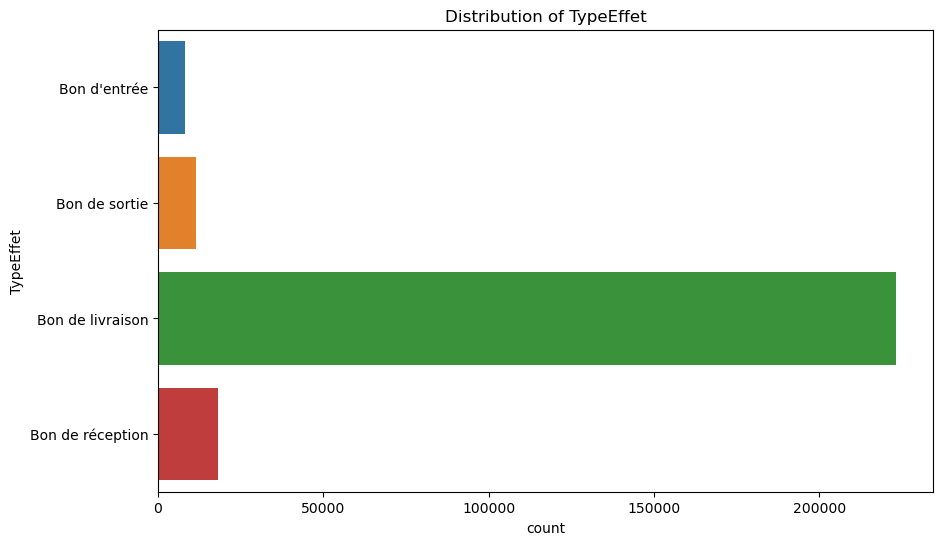

In [8]:
print(data['TypeEffet'].value_counts())
# Count plot for 'TypeEffet'
plt.figure(figsize=(10, 6))
sns.countplot(y='TypeEffet', data=data)
plt.title('Distribution of TypeEffet')
plt.show()

In [9]:
# counting the number of instances of each TypeEffet
data['TypeEffet'].value_counts()

TypeEffet
Bon de livraison    223143
Bon de réception     18098
Bon de sortie        11451
Bon d'entrée          8309
Name: count, dtype: int64

### 1.3 Data Cleaning and Preprocessing:

<font color="#ffe9c4">At this stages we should improve the quality of our data, and make it easy to use and work with by doing the following:</font>

#### 1.3.1 Data Cleanning:
<font color="#ffe9c4">Clean the raw data by fixing attributes types,handling missing values, outliers, and inconsistencies.</font>


First, we worked to change the type of attributes so we can work with them

In [10]:
# Data Types Assingment
data['CleEffet'] = data['CleEffet'].astype(str)
data['Date'] = pd.to_datetime(data['Date'], format = '%m/%d/%Y')
data['TypeEffet'] = data['TypeEffet'].astype(str)
data['FamilleArticle'] = data['FamilleArticle'].astype(str)
data['Code Produit'] = data['Code Produit'].astype(str)
data['Reference Produit'] = data['Reference Produit'].astype(str)
data['NLot'] = data['NLot'].astype(str)
data['Produit_Designation'] = data['Produit_Designation'].astype(str)
data['DetailEffet_Designation'] = data['DetailEffet_Designation'].astype(str)
data['Code Produit'] = data['Code Produit'].astype(str)
data['PrixAchat'] = data['PrixAchat'].str.replace(',', '').astype('float64')
data['PrixUnitaireTTC'] = data['PrixUnitaireTTC'].str.replace(',', '').astype('float64')
data['DetailEffet_Marge'] = data['DetailEffet_Marge'].str.replace(',', '').astype('float64')
data['Effet_Marge'] = data['Effet_Marge'].str.replace(',', '').astype('float64')
data['MontantHT'] = data['MontantHT'].str.replace(',', '').astype('float64')
data['Payement'] = data['Payement'].str.replace(',', '').astype('float64')

Second we will check for messing values in our data

In [11]:
# missing values
missing_values = data.isnull().sum()
print(missing_values)


CleEffet                   0
Date                       0
TypeEffet                  0
FamilleArticle             0
Code Produit               0
Reference Produit          0
NLot                       0
Produit_Designation        0
DetailEffet_Designation    0
Quantite                   0
PrixAchat                  0
PrixUnitaireTTC            0
DetailEffet_Marge          0
Effet_Marge                0
MontantHT                  0
Payement                   0
dtype: int64


So we don't have messing values lets see if there is duplicate values

In [44]:
# duplicate values
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

       CleEffet       Date         TypeEffet                FamilleArticle  \
363         164 2012-08-28      Bon d'entrée            Semences concombre   
399         184 2012-08-29      Bon d'entrée            Produit Fongicides   
401         185 2012-08-29      Bon d'entrée            Produit Fongicides   
422         193 2012-08-29      Bon d'entrée            Produit Fongicides   
443         204 2012-08-29      Bon d'entrée            Produit Fongicides   
...         ...        ...               ...                           ...   
205659    58065 2020-07-25     Bon de sortie           Matériel apiculture   
208764    58624 2020-09-30  Bon de livraison  Materiels de l'arboriculture   
208937    58641 2020-10-03     Bon de sortie                 Semences feve   
208938    58641 2020-10-03     Bon de sortie                 Semences feve   
255826    67243 2022-05-25  Bon de livraison                        Detail   

       Code Produit Reference Produit         NLot Produit_Desi

Those instances cannot be considered as duplicates so we won't buther with them

#### 1.3.2 Data Preprocessing:
<font color="#ffe9c4">Preprocess the data to transform it into a suitable format (type) for analysis since most of our data are of type object. This step include also normalization, standardization, and encoding categorical variables and also transforming the attributes names and content to english since they are written in french.</font>

As said before our goal from the project is to predict whether investing money in a certain product familly in a certain periode of the year is beneficial for the company or not.So we will be interested with the TypeEffet='Bon de livraison'

In [13]:
dataLivraison = data[data['TypeEffet'] == 'Bon de livraison']

In the generated tables we found out that some product familly have an negative total profit as example "Courgette_Hybride" <strong>(we should move it to cleaning i think)</strong>

In [14]:
dataLivraison[dataLivraison['FamilleArticle'] == 'Courgette_Hybride']
dataLivraison.query('FamilleArticle == "Courgette_Hybride" and Effet_Marge < 0')

,CleEffet,Date,TypeEffet,FamilleArticle,Code Produit,Reference Produit,NLot,Produit_Designation,DetailEffet_Designation,Quantite,PrixAchat,PrixUnitaireTTC,DetailEffet_Marge,Effet_Marge,MontantHT,Payement
46409,28007,2014-08-05,Bon de livraison,Courgette_Hybride,0204-013,0204,11585885,Produit_Anon_1470,Detail_Anon_5463,1.0,3200.00,3550.0,2.790900e+02,-2.604944e+04,133290.0,132504.99
46423,28007,2014-08-05,Bon de livraison,Courgette_Hybride,0204-012,0204,F25026120101T0,Produit_Anon_1469,Detail_Anon_3874,1.0,5800.00,6200.0,3.891600e+02,-2.604944e+04,133290.0,132504.99
54626,29942,2015-02-07,Bon de livraison,Courgette_Hybride,0104-011,0104,4 A 0351/5,Produit_Anon_157,Detail_Anon_157,1.0,2400.00,2900.0,-4.000000e+10,-3.999994e+10,501944.0,501409.00
56270,30194,2015-03-12,Bon de livraison,Courgette_Hybride,0104-007,0104,101726800,Produit_Anon_159,Detail_Anon_5971,2.0,6400.00,7000.0,1.122270e+03,-1.749042e+05,502490.0,499699.99
56836,30245,2015-03-19,Bon de livraison,Courgette_Hybride,0104-007,0104,101726800,Produit_Anon_159,Detail_Anon_5971,1.0,6400.00,7300.0,8.263000e+02,-8.395600e+02,594270.0,588270.00
56837,30245,2015-03-19,Bon de livraison,Courgette_Hybride,0104-007,0104,101726800,Produit_Anon_159,Detail_Anon_5971,1.0,6400.00,7100.0,6.283200e+02,-8.395600e+02,594270.0,588270.00
61230,30949,2015-05-05,Bon de livraison,Courgette_Hybride,0204-012,0204,F25026110101T1,Produit_Anon_1469,Detail_Anon_3874,1.0,5750.00,5062.5,-7.118300e+02,-2.847320e+03,20250.0,0.00
61231,30949,2015-05-05,Bon de livraison,Courgette_Hybride,0204-012,0204,F25026120101T0,Produit_Anon_1469,Detail_Anon_3874,3.0,5800.00,5062.5,-2.135490e+03,-2.847320e+03,20250.0,0.00
206596,58231,2020-08-17,Bon de livraison,Courgette_Hybride,0204-012,0204,NO5814180201T0,Produit_Anon_1469,Detail_Anon_9836,2.0,8849.99,9500.0,2.935000e+03,-2.065000e+03,89000.0,0.00
207908,58464,2020-09-16,Bon de livraison,Courgette_Hybride,0204-012,0204,NO5814180201T0,Produit_Anon_1469,Detail_Anon_9836,2.0,8849.99,9000.0,1.900200e+03,-7.115156e+04,124140.0,0.00


The corrupted data instances found before here we are going to fix their 'DetailEffet_Marge'.so first we should first find the correct onces and calculate what is known as unitMargin 

In [15]:
correct_marge=data.query('(PrixUnitaireTTC - PrixAchat)  == DetailEffet_Marge/Quantite and TypeEffet == "Bon de livraison"' )
correct_marge['unitMargin'] = correct_marge['DetailEffet_Marge'] / correct_marge['Quantite']

C:\Users\eternel store\AppData\Local\Temp\ipykernel_18380\2956176491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_marge['unitMargin'] = correct_marge['DetailEffet_Marge'] / correct_marge['Quantite']


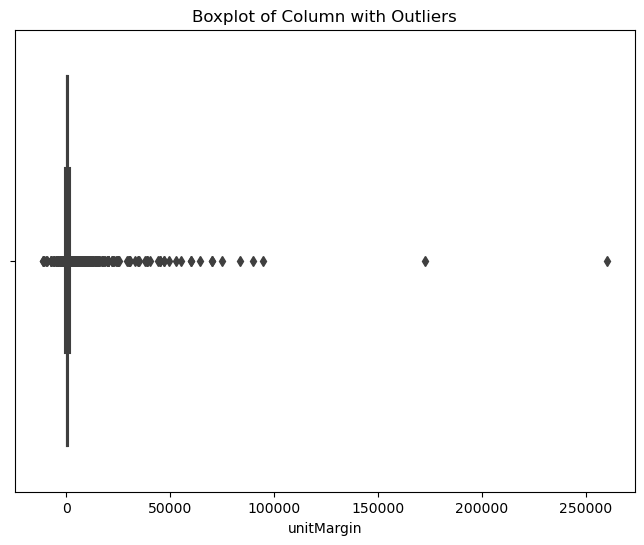

IndexError: boolean index did not match indexed array along dimension 0; dimension is 261001 but corresponding boolean dimension is 22312

In [17]:
# outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=correct_marge['unitMargin'])
plt.title('Boxplot of Column with Outliers')
plt.show()

# Detect outliers using z-score method and display them
z_scores = stats.zscore(correct_marge['unitMargin'])
threshold = 3
outliers_indices = data.index[(z_scores > threshold)]
outliers = data.loc[outliers_indices, ['FamilleArticle', 'DetailEffet_Marge', 'Quantite', 'unitMargin']]
outliers_sorted = outliers.sort_values(by='unitMargin', ascending=False)

article_counts = outliers_sorted['FamilleArticle'].value_counts()

# Plotting histogram of 'FamilleArticle' occurrences
plt.figure(figsize=(10, 6))
article_counts.plot(kind='bar', color='skyblue')
plt.title('Occurrences of FamilleArticle in Outliers')
plt.xlabel('FamilleArticle')
plt.ylabel('Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
correct_marge.describe()

,Date,Quantite,PrixAchat,PrixUnitaireTTC,DetailEffet_Marge,Effet_Marge,MontantHT,Payement,unitMargin
count,22312,22312.000000,22312.000000,22312.000000,22312.000000,22312.000000,2.231200e+04,2.231200e+04,22312.000000
mean,2017-08-19 08:32:38.121190400,13.341101,4012.585261,4777.003858,2339.053531,7980.931328,5.719730e+04,2.096129e+04,764.418597
min,2010-03-01 00:00:00,0.010000,1.000000,0.000000,-102000.000000,-873326.680000,0.000000e+00,0.000000e+00,-11250.000000
25%,2014-05-31 00:00:00,1.000000,750.000000,950.000000,300.000000,1200.000000,7.500000e+03,0.000000e+00,150.000000
50%,2018-03-03 00:00:00,2.000000,1800.000000,2250.000000,800.000000,3679.880000,2.300000e+04,0.000000e+00,350.000000
75%,2020-03-29 00:00:00,5.000000,4500.000000,5200.000000,2050.000000,9000.000000,6.247000e+04,1.121000e+04,731.250000
max,2022-07-28 00:00:00,16000.000000,378000.000000,472500.000000,521885.000000,554400.260000,4.419000e+06,3.600000e+06,260000.000000
std,NaN,169.057079,10237.463935,12377.668518,9598.520677,19196.725732,1.217756e+05,7.501396e+04,3190.748007


In [19]:
# some examples to see
correct_marge.loc[correct_marge['Quantite'] == 0.010000]
correct_marge.loc[correct_marge['DetailEffet_Marge'] == -102000]
correct_marge.loc[correct_marge['MontantHT'] == 4.419000e+06]
correct_marge.loc[correct_marge['Payement'] == 3.600000e+06]
dataLivraison.loc[dataLivraison['CleEffet'] == '8460']

,CleEffet,Date,TypeEffet,FamilleArticle,Code Produit,Reference Produit,NLot,Produit_Designation,DetailEffet_Designation,Quantite,PrixAchat,PrixUnitaireTTC,DetailEffet_Marge,Effet_Marge,MontantHT,Payement
12105,8460,2013-03-13,Bon de livraison,Pastèque_Hybride,11615685,0203,10526334,Produit_Anon_393,Detail_Anon_1439,40.0,5400.0,5400.0,0.0,-73932.1,4419000.0,0.0
12106,8460,2013-03-13,Bon de livraison,Pastèque_Hybride,0203-007,0203,3008595,Produit_Anon_394,Detail_Anon_2476,10.0,6750.0,4500.0,6017.9,-73932.1,4419000.0,0.0
12107,8460,2013-03-13,Bon de livraison,tourbe,12008,12000,no lot,Produit_Anon_1690,Detail_Anon_1669,100.0,1080.0,1080.0,10050.0,-73932.1,4419000.0,0.0
12108,8460,2013-03-13,Bon de livraison,Pastèque_Hybride,0203-038,0203,10678493,Produit_Anon_2086,Detail_Anon_2303,900.0,4600.0,4500.0,-90000.0,-73932.1,4419000.0,0.0


And here for each famille in the correct data we calculate the average of the unitMargin and then we will use them in the correction process of the corrupted data

In [20]:
averagebyfamille=correct_marge.groupby('FamilleArticle')['unitMargin'].mean().reset_index()
averagebyfamille_sorted = averagebyfamille.sort_values('unitMargin', ascending=False)
averagebyfamille_sorted

,FamilleArticle,unitMargin
16,Matériel de pompe 400 l,2977.002299
15,Matériel bovin,2844.457251
41,Semences lisèrne,2539.583333
22,Matériels d'irrigation,1906.696171
23,Matériels du labour,1616.901890
...,...,...
9,HOMS,19.166667
58,Semences Pomme de tèrre,8.657895
83,semmence orge,6.000000
79,plantes olives,0.000000


and finally we left we our fully corrected data 'fixedData'

In [21]:
fixedData = data[data['TypeEffet'] == 'Bon de livraison']
# Multiply 'averagebyfamille' by 'quantity' and override 'Detaileffetmarge'
fixedData['DetailEffet_Marge'] = fixedData['FamilleArticle'].map(averagebyfamille.set_index('FamilleArticle')['unitMargin']) * fixedData['Quantite']
fixedData.head()
fixedData.describe()


C:\Users\eternel store\AppData\Local\Temp\ipykernel_18380\2652566769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixedData['DetailEffet_Marge'] = fixedData['FamilleArticle'].map(averagebyfamille.set_index('FamilleArticle')['unitMargin']) * fixedData['Quantite']


,Date,Quantite,PrixAchat,PrixUnitaireTTC,DetailEffet_Marge,Effet_Marge,MontantHT,Payement
count,223143,223143.000000,223143.000000,223143.000000,2.230750e+05,2.231430e+05,2.231430e+05,2.231430e+05
mean,2017-12-02 06:07:23.823019520,12.099271,2225.001188,2618.948728,7.969003e+03,-6.779440e+06,2.308019e+05,1.694300e+05
min,2010-03-01 00:00:00,0.000000,0.000000,0.000000,-7.095000e+04,-3.999994e+10,0.000000e+00,0.000000e+00
25%,2015-08-30 00:00:00,1.000000,130.000000,250.000000,7.071981e+02,5.578680e+03,3.690000e+04,0.000000e+00
50%,2018-01-18 00:00:00,2.000000,632.500000,850.000000,1.548645e+03,2.565007e+04,1.802650e+05,6.546000e+04
75%,2020-04-21 00:00:00,4.000000,2475.000000,2900.000000,3.097291e+03,4.825951e+04,3.413040e+05,2.800810e+05
max,2022-07-28 00:00:00,40000.000000,378000.000000,718500.000000,3.948462e+07,2.900277e+06,2.000000e+07,3.600000e+06
std,NaN,147.832150,5929.658180,7449.916125,1.239285e+05,5.219439e+08,2.429736e+05,2.345190e+05


we need to drop the columns that we are not interested in 


In [22]:
fixedData = fixedData.drop(columns=['TypeEffet', 'Code Produit', 'Reference Produit', 'NLot', 'Produit_Designation', 'DetailEffet_Designation', 'PrixAchat'])
fixedData

,CleEffet,Date,FamilleArticle,Quantite,PrixUnitaireTTC,DetailEffet_Marge,Effet_Marge,MontantHT,Payement
623,340,2012-09-03,Detail,1.0,300.0,1548.645280,299.00,300.0,0.0
624,341,2012-09-03,Detail,150.0,1.0,232296.792000,0.00,150.0,0.0
2166,540,2012-09-08,Matériels Tronceneuses,1.0,250.0,1447.671756,249.00,250.0,250.0
2172,546,2012-09-08,Detail,6.0,250.0,9291.871680,1494.00,1500.0,1500.0
2173,547,2012-09-08,Produit Insecticides,1.0,500.0,516.555515,-18498.00,1550.0,1500.0
...,...,...,...,...,...,...,...,...,...
260996,68349,2022-07-28,Produit Insecticides,2.0,1000.0,1033.111031,500.00,2000.0,0.0
260997,68350,2022-07-28,Produit Fongicides,1.0,4900.0,889.934398,808.51,4900.0,0.0
260998,68351,2022-07-28,Matériel bovin,1.0,3500.0,2844.457251,1750.00,3500.0,0.0
260999,68352,2022-07-28,Pastèque_Hybride,3.0,9700.0,1470.510949,3000.00,29100.0,0.0


### 1.4 Exploratory Data Analysis (EDA) (After Cleaning):

<font color="#ffe9c4">Explore the data to gain insights and an initial understanding of its characteristics. This may involve the use of statistical summaries, visualizations, and other exploratory techniques.</font>

first we want to see the sum profit(DetailEffet_Marge) of each product familly from 2012 unitl 2020 in each month so we can know which product familly has the best profit in a certain month 

In [23]:
# Extract month and year from the 'Date' column
fixedData['Month'] = fixedData['Date'].dt.month

# Group by 'FamilleArticle' and 'Month' and sum the 'DetailEffet_Marge' for each group
grouped = fixedData.groupby(['FamilleArticle', 'Month'])['DetailEffet_Marge'].sum().reset_index()

# Splitting categories into groups of 10 for plotting
categories = grouped['FamilleArticle'].unique()

for i in range(len(categories) // 10 + 1):
    plt.figure(figsize=(10, 6))
    
    for j in range(i * 10, min((i + 1) * 10, len(categories))):
        plt.title(f'Categories {i * 10 + 1} to {min((i + 1) * 10, len(categories))}')
        
        category = categories[j]
        category_data = grouped[grouped['FamilleArticle'] == category]
        plt.plot(category_data['Month'], category_data['DetailEffet_Marge'], label=category)
        
        plt.xlabel('Months')
        plt.ylabel('DetailEffet_Marge')
    
    plt.legend()
    plt.tight_layout()
    
    # Save each set of 10 categories as an individual image file
    plt.savefig(f'plot_categories_{i * 10 + 1}_to_{min((i + 1) * 10, len(categories))}.png')
    plt.close()  # Close the current figure to prevent overlapping plots

And to make things clearer we will put for each month of the year a table that contains the  sum profit of each product familly and its purcentage from the whole profit of the month and rank them decreasingly

In [24]:
# Define a custom function to sort the DataFrame within each group
def sort_by_detail_marge(group):
    return group.sort_values(by='DetailEffet_Marge', ascending=False)

# Apply the custom function to each group within each month
sorted_grouped = grouped.groupby('Month', group_keys=False).apply(sort_by_detail_marge)

# Path to save PDF files
pdf_path = 'tables'

# Iterate over each month
for month, month_group in sorted_grouped.groupby('Month'):
    # Calculate the percentage column and round to two decimal places
    month_group['Percentage'] = (month_group['DetailEffet_Marge'] / month_group['DetailEffet_Marge'].sum() * 100).round(2)

    # Round 'DetailEffet_Marge' to two decimal places
    month_group['DetailEffet_Marge'] = month_group['DetailEffet_Marge'].round(2)

    # Create a table using matplotlib
    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')

    # Include 'Percentage' column in the table
    table_data = month_group[['FamilleArticle', 'DetailEffet_Marge', 'Percentage']].values
    col_labels = ['FamilleArticle', 'DetailEffet_Marge', 'Percentage']
    ax.table(cellText=table_data,
             colLabels=col_labels,
             cellLoc='center', loc='center')

    # Save the table as a PDF file
    pdf_filename = f'{pdf_path}/table_{month}.pdf'
    plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')
    plt.close()

c:\Users\eternel store\.conda\envs\DM_ENV\Lib\site-packages\fontTools\misc\py23.py:11: DeprecationWarning: The py23 module has been deprecated and will be removed in a future release. Please update your code.
  warnings.warn(


and in here we have added if the a certain famille article is beneficial in a certain month of the year and we done that from the previous purcentage if it is greater than a certain threshold which after some reshearch in company profits we found out that this threshold is equal to 5% of the monthly total profit

In [25]:
# Extract month and year from the 'Date' column
fixedData['Month'] = fixedData['Date'].dt.month
fixedData['Year'] = fixedData['Date'].dt.year

# Group by 'FamilleArticle', 'Month', and 'Year' and sum the 'DetailEffet_Marge' for each group
grouped = fixedData.groupby(['FamilleArticle', 'Month', 'Year'])['DetailEffet_Marge'].sum().reset_index()

# Group by 'FamilleArticle' and 'Month' and calculate the average of the monthly sums
average_grouped = grouped.groupby(['FamilleArticle', 'Month'])['DetailEffet_Marge'].mean().reset_index()

# Define a custom function to sort the DataFrame within each group
def sort_by_detail_marge(group):
    return group.sort_values(by='DetailEffet_Marge', ascending=False)

# Apply the custom function to each group within each month
sorted_grouped = average_grouped.groupby('Month', group_keys=False).apply(sort_by_detail_marge)

# Define a function to determine profitability
def is_profitable(percentage):
    return "Yes" if percentage > 5 else "No"

# Path to save PDF files
pdf_path = 'fixedtables'

# Iterate over each month
for month, month_group in sorted_grouped.groupby('Month'):
    # Calculate the percentage column and round to two decimal places
    month_group['Percentage'] = (month_group['DetailEffet_Marge'] / month_group['DetailEffet_Marge'].sum() * 100).round(2)

    # Determine profitability for each 'FamilleArticle'
    month_group['Profitable'] = month_group['Percentage'].apply(is_profitable)

    # Round 'DetailEffet_Marge' to two decimal places
    month_group['DetailEffet_Marge'] = month_group['DetailEffet_Marge'].round(2)

    # Create a table using matplotlib
    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')

    # Include 'Percentage' and 'Profitable' columns in the table
    table_data = month_group[['FamilleArticle', 'DetailEffet_Marge', 'Percentage', 'Profitable']].values
    col_labels = ['FamilleArticle', 'DetailEffet_Marge', 'Percentage', 'Profitable']
    ax.table(cellText=table_data,
             colLabels=col_labels,
             cellLoc='center', loc='center')

    # Save the table as a PDF file
    pdf_filename = f'{pdf_path}/table_{month}.pdf'
    plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')
    plt.close()

   


# Group and calculate averages as described
grouped = fixedData.groupby(['FamilleArticle', 'Month', 'Year'])['DetailEffet_Marge'].sum().reset_index()
average_grouped = grouped.groupby(['FamilleArticle', 'Month'])['DetailEffet_Marge'].mean().reset_index()

# Define the profitability function
def is_profitable(marge, famille_article, month):
    # Find the average marge for the given 'FamilleArticle' and 'Month'
    avg_marge = average_grouped[(average_grouped['FamilleArticle'] == famille_article) & (average_grouped['Month'] == month)]['DetailEffet_Marge'].iloc[0]
    percentage = (marge / avg_marge) * 100
    return "Yes" if percentage > 5 else "No"

# Apply the function to the original data
fixedData['Profitability'] = fixedData.apply(lambda row: is_profitable(row['DetailEffet_Marge'], row['FamilleArticle'], row['Month']), axis=1)

fixedData

C:\Users\eternel store\AppData\Local\Temp\ipykernel_18380\280458944.py:64: RuntimeWarning: invalid value encountered in scalar divide
  percentage = (marge / avg_marge) * 100


,CleEffet,Date,FamilleArticle,Quantite,PrixUnitaireTTC,DetailEffet_Marge,Effet_Marge,MontantHT,Payement,Month,Year,Profitability
623,340,2012-09-03,Detail,1.0,300.0,1548.645280,299.00,300.0,0.0,9,2012,No
624,341,2012-09-03,Detail,150.0,1.0,232296.792000,0.00,150.0,0.0,9,2012,Yes
2166,540,2012-09-08,Matériels Tronceneuses,1.0,250.0,1447.671756,249.00,250.0,250.0,9,2012,No
2172,546,2012-09-08,Detail,6.0,250.0,9291.871680,1494.00,1500.0,1500.0,9,2012,No
2173,547,2012-09-08,Produit Insecticides,1.0,500.0,516.555515,-18498.00,1550.0,1500.0,9,2012,No
...,...,...,...,...,...,...,...,...,...,...,...,...
260996,68349,2022-07-28,Produit Insecticides,2.0,1000.0,1033.111031,500.00,2000.0,0.0,7,2022,No
260997,68350,2022-07-28,Produit Fongicides,1.0,4900.0,889.934398,808.51,4900.0,0.0,7,2022,No
260998,68351,2022-07-28,Matériel bovin,1.0,3500.0,2844.457251,1750.00,3500.0,0.0,7,2022,No
260999,68352,2022-07-28,Pastèque_Hybride,3.0,9700.0,1470.510949,3000.00,29100.0,0.0,7,2022,Yes


In addition to that we added a graph to show the evolution of the profit for each famille article over the periode of 10 years

In [26]:
# Group by 'FamilleArticle' and 'Year' and calculate the sum of 'DetailEffet_Marge' for each group
evolution_data = grouped.groupby(['FamilleArticle', 'Year'])['DetailEffet_Marge'].sum().reset_index()

# Create an evolution graph for each 'FamilleArticle'
for famille, famille_group in evolution_data.groupby('FamilleArticle'):
    plt.figure(figsize=(10, 6))
    plt.plot(famille_group['Year'], famille_group['DetailEffet_Marge'], marker='o', label=famille)
    plt.title(f'Evolution of DetailEffet_Marge for {famille} over Time')
    plt.xlabel('Year')
    plt.ylabel('DetailEffet_Marge Sum')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'evolution_famille/{famille}.png')
    plt.close()


### 1.4 Classification Model (trainning and evalution):

<font color="#ffe9c4">We want to predict the 'Profitability' of certain 'FamilleArticle' in a cretain Month of the Year. So we are creating a classification model that do this job.</font>

In [ ]:
X = fixedData[['FamilleArticle', 'Date']]

# Assuming 'Profitability' is the target column
y = fixedData['Profitability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a pipeline with TF-IDF and Random Forest Classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier())
])

# Define hyperparameters for tuning
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train['FamilleArticle'], y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Make predictions on the test set
predictions = grid_search.predict(X_test['FamilleArticle'])

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('Classification Report:\n', classification_report(y_test, predictions))
print('Confusion Matrix:\n', confusion_matrix(y_test, predictions))

Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 100, 'tfidf__ngram_range': (1, 1)}
Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.99      0.96     40450
         Yes       0.72      0.32      0.44      4179

    accuracy                           0.92     44629
   macro avg       0.83      0.65      0.70     44629
weighted avg       0.91      0.92      0.91     44629

Confusion Matrix:
 [[39933   517]
 [ 2856  1323]]
Prediction for Matériels Tronceneuses on 2024-01-03 00:00:00: No


Example of using the model for prediction

In [ ]:
new_product_name = "Matériel Divers"
new_month = 1 # January
new_data = pd.DataFrame({'FamilleArticle': [new_product_name], 'Month': [new_month]})

# Prediction
prediction_new_data = grid_search.predict(new_data)
print(f'Prediction for {new_product_name} in Month {new_month}: {prediction_new_data[0]}')

Prediction for Matériel Divers in Month 1: No


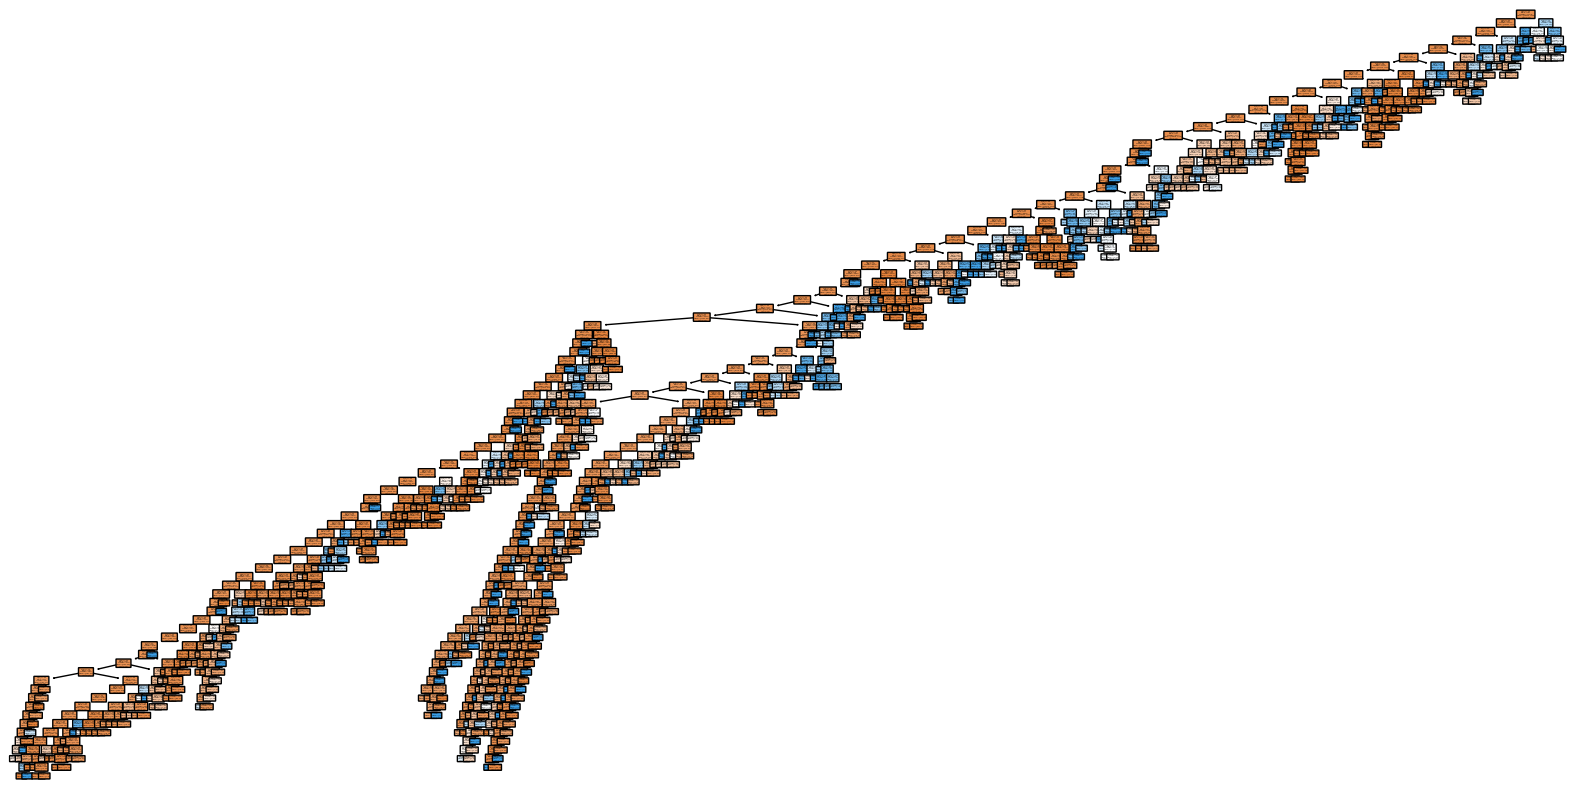

In [ ]:
# Assuming you have already fitted your GridSearchCV object named grid_search
best_rf_model = grid_search.best_estimator_['classifier']
estimator = best_rf_model.estimators_[0]  # Extract one tree

# Plot the decision tree without specifying feature names
plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, class_names=True, rounded=True)
plt.show()


In [ ]:
# Extract month from date
fixedData['Month'] = pd.to_datetime(fixedData['Date']).dt.month

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('famille', OneHotEncoder(handle_unknown='ignore'), ['FamilleArticle']),  # Updated to handle unknown categories
        ('month', 'passthrough', ['Month'])
    ])

# Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Splitting data
X = fixedData[['FamilleArticle', 'Month']]
y = fixedData['Profitability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training
pipeline.fit(X_train, y_train)

# Predicting and Evaluating
predictions = pipeline.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')
print(classification_report(y_test, predictions))


C:\Users\eternel store\AppData\Local\Temp\ipykernel_4336\2752625695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixedData['Month'] = pd.to_datetime(fixedData['Date']).dt.month
c:\Users\eternel store\.conda\envs\DM_ENV\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.92
              precision    recall  f1-score   support

          No       0.93      0.99      0.96     40450
         Yes       0.71      0.30      0.43      4179

    accuracy                           0.92     44629
   macro avg       0.82      0.65      0.69     44629
weighted avg       0.91      0.92      0.91     44629



In [ ]:
# Example with Known 'FamilleArticle'
known_famille_article = "Pastèque_Hybride"  # Replace with a real category from your dataset
known_month = 9  # Example Month (May)

# Example with Unseen 'FamilleArticle'
unseen_famille_article = "Pastèque_Hybride"  # This should be a category not in your dataset
unseen_month = 7  # Example Month (March)

# Creating DataFrames for the examples
known_example = pd.DataFrame({'FamilleArticle': [known_famille_article], 'Month': [known_month]})
unseen_example = pd.DataFrame({'FamilleArticle': [unseen_famille_article], 'Month': [unseen_month]})

# Predictions
known_prediction = pipeline.predict(known_example)
unseen_prediction = pipeline.predict(unseen_example)

# Output the predictions
print(f'Prediction for known example (FamilleArticle: {known_famille_article}, Month: {known_month}): {known_prediction[0]}')
print(f'Prediction for unseen example (FamilleArticle: {unseen_famille_article}, Month: {unseen_month}): {unseen_prediction[0]}')


Prediction for known example (FamilleArticle: Pastèque_Hybride, Month: 9): No
Prediction for unseen example (FamilleArticle: Pastèque_Hybride, Month: 7): No


In [ ]:
# Check the balance of the target variable
balance = fixedData['Profitability'].value_counts()
print(balance)


Profitability
No     202670
Yes     20473
Name: count, dtype: int64


### 1.4 Association Rule:

<font color="#ffe9c4">We want to know which products are sold togather frequently.</font>

We will first create a transactional DataFrame. We want to analyze each product sold within a given transaction on each date. However, the product sold are one in each row. Therefore, we should group all the products sold within  a transaction on a given date with the groupby operation provided in Pandas. 

In [19]:
df_transactions = fixedData.groupby(['CleEffet', 'Date'])[['Produit_Designation', 'FamilleArticle']].apply(lambda x: list(map(tuple, x.values.tolist()))).reset_index(name='transactions')
df_transactions.head()

,CleEffet,Date,transactions
0,10000,2013-04-08,"[(Produit_Anon_469, Matériels joints membrane)..."
1,10001,2013-04-08,"[(Produit_Anon_1532, Matériel Avicole)]"
2,10002,2013-04-08,"[(Produit_Anon_2230, Pastèque_Hybride)]"
3,10003,2013-04-08,"[(Produit_Anon_1057, Matériels d'irrigation), ..."
4,10004,2013-04-08,"[(Produit_Anon_19, Produit Insecticides)]"


Print the number of transactions and  the number of distinct customers and we found that are the same

In [20]:
print("Number of transactions:", len(df_transactions))
print("Number of distinct customers:", len(list(set(df_transactions["CleEffet"]))))

Number of transactions: 42739
Number of distinct customers: 42739



Creating a list containing all the transactions into a variable `transactions`.All the transactions are stored in the `transaction` column of the DataFrame `df_transactions`. 


In [21]:
transactions = df_transactions['transactions'].to_list()
transactions[:5]

[[('Produit_Anon_469', 'Matériels joints membrane'),
  ('Produit_Anon_946', 'Matériels du labour')],
 [('Produit_Anon_1532', 'Matériel Avicole')],
 [('Produit_Anon_2230', 'Pastèque_Hybride')],
 [('Produit_Anon_1057', "Matériels d'irrigation"),
  ('Produit_Anon_1825', "Matériels d'irrigation"),
  ('Produit_Anon_2176', "Matériels d'irrigation")],
 [('Produit_Anon_19', 'Produit Insecticides')]]

Encode the transactions into a **one-hot encoded transactional dataset**. Store the encoded dataset into a variable called `transaction_dataset`. We first create a TransactionEncoder() object and then, call the fit_transform() method on our transactions

In [22]:
te = TransactionEncoder()
transaction_dataset = te.fit(transactions).transform(transactions)
transaction_dataset

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

Then we create a DataFrame from the one-hot encoded `transaction_dataset` and store the dataframe in a variable `df_transactions_onehot`. We set the columns of the dataframe to the `transaction_encoder.columns_` values.

In [23]:
df_transactions_onehot = pd.DataFrame(transaction_dataset, columns=te.columns_)
df_transactions_onehot.head()

,"(Produit_Anon_0, Produit Insecticides)","(Produit_Anon_1, Matériel bovin)","(Produit_Anon_10, Produit Insecticides)","(Produit_Anon_1001, Matériels d'irrigation)","(Produit_Anon_1002, Matériel pulvérisation)","(Produit_Anon_1004, Matériels d'irrigation)","(Produit_Anon_1005, Matériels du labour)","(Produit_Anon_1006, Matériels d'irrigation)","(Produit_Anon_1007, Matériels d'irrigation)","(Produit_Anon_1008, Matériels d'irrigation)",...,"(Produit_Anon_990, Matériels d'irrigation)","(Produit_Anon_991, Matériel des moteur)","(Produit_Anon_992, Matériel des moteur)","(Produit_Anon_993, Matériel des moteur)","(Produit_Anon_994, Matériels du labour)","(Produit_Anon_995, Matériels du labour)","(Produit_Anon_996, Matériels du labour)","(Produit_Anon_997, Matériels du labour)","(Produit_Anon_998, Matériels du labour)","(Produit_Anon_999, Matériels du labour)"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


We apply the **Fpgrowth** algorithm on the datasted stored in `df_transactions_onehot` and then we set the value of the minimum support `min_support` to 0.01.  

In [24]:
df_freq_itemsets = fpgrowth(df_transactions_onehot, min_support=0.01, use_colnames=True)
df_freq_itemsets

,support,itemsets
0,0.041601,"((Produit_Anon_19, Produit Insecticides))"
1,0.032944,"((Produit_Anon_1475, Matériel Divers))"
2,0.126348,"((Produit_Anon_259, Detail))"
3,0.011676,"((Produit_Anon_2704, Produit Engrais))"
4,0.011816,"((Produit_Anon_315, Matériel apiculture))"
...,...,...
226,0.012728,"((Produit_Anon_3445, Detail), (Produit_Anon_39..."
227,0.012939,"((Produit_Anon_259, Detail), (Produit_Anon_390..."
228,0.012705,"((Produit_Anon_3445, Detail), (Produit_Anon_25..."
229,0.012424,"((Produit_Anon_3445, Detail), (Produit_Anon_39..."


We create a new column with the length of each transaction (i.e., the number of elements in each transaction).

In [25]:
df_freq_itemsets['length'] = df_freq_itemsets['itemsets'].apply(lambda x: len(x))
df_freq_itemsets

,support,itemsets,length
0,0.041601,"((Produit_Anon_19, Produit Insecticides))",1
1,0.032944,"((Produit_Anon_1475, Matériel Divers))",1
2,0.126348,"((Produit_Anon_259, Detail))",1
3,0.011676,"((Produit_Anon_2704, Produit Engrais))",1
4,0.011816,"((Produit_Anon_315, Matériel apiculture))",1
...,...,...,...
226,0.012728,"((Produit_Anon_3445, Detail), (Produit_Anon_39...",3
227,0.012939,"((Produit_Anon_259, Detail), (Produit_Anon_390...",4
228,0.012705,"((Produit_Anon_3445, Detail), (Produit_Anon_25...",4
229,0.012424,"((Produit_Anon_3445, Detail), (Produit_Anon_39...",4


We generate the association rules using `confidence` as metric and set the `min_threshold` to 0.01. We store the generated association rules in a DataFrame `df_ar`.

In [26]:
df_ar = association_rules(df_freq_itemsets, metric = 'confidence', min_threshold = 0.05)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"((Produit_Anon_19, Produit Insecticides))","((Produit_Anon_259, Detail))",0.041601,0.126348,0.030862,0.741845,5.871427,0.025605,3.384211,0.865698
1,"((Produit_Anon_259, Detail))","((Produit_Anon_19, Produit Insecticides))",0.126348,0.041601,0.030862,0.244259,5.871427,0.025605,1.268158,0.949673
2,"((Produit_Anon_19, Produit Insecticides))","((Produit_Anon_3445, Detail))",0.041601,0.049744,0.022134,0.532058,10.695977,0.020065,2.030716,0.945856
3,"((Produit_Anon_3445, Detail))","((Produit_Anon_19, Produit Insecticides))",0.049744,0.041601,0.022134,0.444967,10.695977,0.020065,1.726742,0.953961
4,"((Produit_Anon_19, Produit Insecticides))","((Produit_Anon_5626, Detail))",0.041601,0.049089,0.022088,0.530934,10.815812,0.020045,2.027243,0.946937
...,...,...,...,...,...,...,...,...,...,...
1835,"((Produit_Anon_3445, Detail))","((Produit_Anon_259, Detail), (Produit_Anon_390...",0.049744,0.012939,0.012401,0.249294,19.266900,0.011757,1.314844,0.997728
1836,"((Produit_Anon_3901, Detail))","((Produit_Anon_3445, Detail), (Produit_Anon_25...",0.055242,0.013313,0.012401,0.224481,16.861336,0.011665,1.272292,0.995697
1837,"((Produit_Anon_5626, Detail))","((Produit_Anon_3445, Detail), (Produit_Anon_25...",0.049089,0.012705,0.012401,0.252622,19.883595,0.011777,1.321011,0.998734
1838,"((Produit_Anon_259, Detail))","((Produit_Anon_3445, Detail), (Produit_Anon_39...",0.126348,0.012424,0.012401,0.098148,7.899724,0.010831,1.095053,0.999727


We extract the transaction that the minimum confidence is 0.7 and the minimum lift is 2

In [27]:
df_ar[df_ar['confidence']>=0.7 & df_ar['lift']>=2][['antecedents','consequents']]

,antecedents,consequents
0,"((Produit_Anon_19, Produit Insecticides))","((Produit_Anon_259, Detail))"
8,"((Produit_Anon_19, Produit Insecticides), (Pro...","((Produit_Anon_3445, Detail))"
10,"((Produit_Anon_19, Produit Insecticides), (Pro...","((Produit_Anon_259, Detail))"
15,"((Produit_Anon_19, Produit Insecticides), (Pro...","((Produit_Anon_259, Detail))"
20,"((Produit_Anon_19, Produit Insecticides), (Pro...","((Produit_Anon_5626, Detail))"
...,...,...
1828,"((Produit_Anon_3445, Detail), (Produit_Anon_59...","((Produit_Anon_259, Detail), (Produit_Anon_390..."
1831,"((Produit_Anon_3901, Detail), (Produit_Anon_59...","((Produit_Anon_3445, Detail), (Produit_Anon_25..."
1833,"((Produit_Anon_5986, Sachet potageur), (Produi...","((Produit_Anon_3445, Detail), (Produit_Anon_25..."
1834,"((Produit_Anon_259, Detail), (Produit_Anon_598...","((Produit_Anon_3445, Detail), (Produit_Anon_39..."


<font color="#ff000"> ---------------------------------------------------------------------------------------------------------------------------------------------- </font>

In [ ]:
print("Number of transactions:", len(df_transactions))
print("Number of distinct customers:", len(list(set(df_transactions["CleEffet"]))))

Number of transactions: 42739
Number of distinct customers: 42739


In [ ]:
transactions = df_transactions['transactions'].to_list()
transactions[:5]

[['Matériels joints membrane', 'Matériels du labour'],
 ['Matériel Avicole'],
 ['Pastèque_Hybride'],
 ["Matériels d'irrigation",
  "Matériels d'irrigation",
  "Matériels d'irrigation"],
 ['Produit Insecticides']]

In [ ]:
te = TransactionEncoder()
transaction_dataset = te.fit(transactions).transform(transactions)
transaction_dataset

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
df_transactions_onehot = pd.DataFrame(transaction_dataset, columns=te.columns_)
df_transactions_onehot.head()

,ALIMENT DE BETAIL,Aubergine_Hybride,Chou-fleur_Hybride,Concombre _Hybride,Courgette_Hybride,Detail,Divers de Hsen,Engrais soluble,FLEUR,Grands sachets de Ghazioui,...,Tomates_Hybride,des arbres,matériels de taille,plantes olives,produit apiculture,produit biostimulant,semence fourrage,semmence orge,semmence poureau,tourbe
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_freq_itemsets = fpgrowth(df_transactions_onehot, min_support=0.01, use_colnames=True)
df_freq_itemsets

,support,itemsets
0,0.043005,(Matériels du labour)
1,0.028054,(Matériel Avicole)
2,0.030464,(Pastèque_Hybride)
3,0.101781,(Matériels d'irrigation)
4,0.206579,(Produit Insecticides)
...,...,...
10067,0.010155,"(Matériel apiculture, FLEUR, Produit Fongicides)"
10068,0.010084,"(Prouduits Raticide + anti insect, FLEUR, Prod..."
10069,0.010389,"(Produit Engrais, Detail, FLEUR, Produit Fongi..."
10070,0.010108,"(Detail, FLEUR, Produit Insecticides, Produit ..."


In [ ]:
df_freq_itemsets['length'] = df_freq_itemsets['itemsets'].apply(lambda x: len(x))
df_freq_itemsets

,support,itemsets,length
0,0.043005,(Matériels du labour),1
1,0.028054,(Matériel Avicole),1
2,0.030464,(Pastèque_Hybride),1
3,0.101781,(Matériels d'irrigation),1
4,0.206579,(Produit Insecticides),1
...,...,...,...
10067,0.010155,"(Matériel apiculture, FLEUR, Produit Fongicides)",3
10068,0.010084,"(Prouduits Raticide + anti insect, FLEUR, Prod...",3
10069,0.010389,"(Produit Engrais, Detail, FLEUR, Produit Fongi...",4
10070,0.010108,"(Detail, FLEUR, Produit Insecticides, Produit ...",4


In [ ]:
df_ar = association_rules(df_freq_itemsets, metric = 'confidence', min_threshold = 0.05)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Matériels d'irrigation),(Matériels du labour),0.101781,0.043005,0.013360,0.131264,3.052289,0.008983,1.101595,0.748567
1,(Matériels du labour),(Matériels d'irrigation),0.043005,0.101781,0.013360,0.310664,3.052289,0.008983,1.303021,0.702592
2,(Matériels du labour),(Matériel Divers),0.043005,0.128431,0.019818,0.460827,3.588137,0.014295,1.616493,0.753718
3,(Matériel Divers),(Matériels du labour),0.128431,0.043005,0.019818,0.154309,3.588137,0.014295,1.131612,0.827592
4,(Matériel apiculture),(Matériels du labour),0.128478,0.043005,0.020169,0.156984,3.650351,0.014644,1.135204,0.833087
...,...,...,...,...,...,...,...,...,...,...
475781,"(FLEUR, Produit Fongicides)","(Matériel apiculture, Detail)",0.011231,0.062238,0.010108,0.900000,14.460564,0.009409,9.377618,0.941419
475782,(Matériel apiculture),"(Detail, FLEUR, Produit Fongicides)",0.128478,0.010927,0.010108,0.078674,7.200121,0.008704,1.073533,0.988056
475783,(Detail),"(Matériel apiculture, FLEUR, Produit Fongicides)",0.156181,0.010155,0.010108,0.064719,6.373340,0.008522,1.058340,0.999143
475784,(FLEUR),"(Matériel apiculture, Detail, Produit Fongicides)",0.016028,0.040361,0.010108,0.630657,15.625302,0.009461,2.598231,0.951247
